In [1]:
# Import modules
# Make sure you have installed netCDF4, xarray, and nc-time-axis  
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [4]:
nino_34 = ds.sst.sel(lon=slice(190, 240), lat=slice(-5,5))
#tas.isel(time = 2).plot(robust=True, figsize=(8, 6))

# question 1

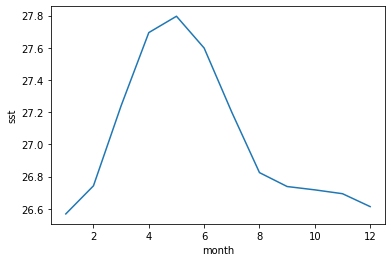

In [5]:
# Calculate the climatology 
group_data = nino_34.groupby('time.month')

nino_34_clim = group_data.mean()
nino_34_clim

nino_34_clim.mean(dim=['lat', 'lon']).plot()

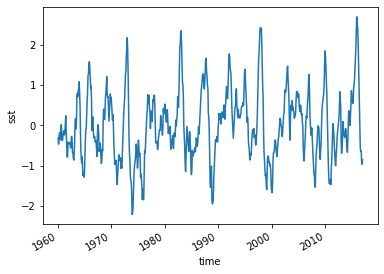

In [6]:
# Apply mean to grouped data, and then compute the anomaly 
nino_34_anom = group_data - group_data.mean(dim='time')
nino_34_anom

# Plot anomalies 
nino_34_anom.mean(dim=['lat', 'lon']).plot()

question 2

In [7]:
nino_34.mean()

<xarray.DataArray 'sst' ()>
array(27.035412, dtype=float32)

In [8]:
nino_34_roll = nino_34.mean(dim=['lat', 'lon']).rolling(time=3).mean() -27.04
nino_34_roll

<xarray.DataArray 'sst' (time: 684)>
array([            nan,             nan, -5.41875839e-01, -1.22367859e-01,
        3.25580597e-01,  4.15121078e-01,  2.65201569e-01,  5.63812256e-03,
       -2.12493896e-01, -4.52377319e-01, -6.21196747e-01, -6.81606293e-01,
       -6.68609619e-01, -5.76759338e-01, -3.78498077e-01, -1.07955933e-03,
        4.11960602e-01,  6.91267014e-01,  5.64611435e-01,  8.40950012e-02,
       -5.41759491e-01, -9.43027496e-01, -1.01253128e+00, -9.33780670e-01,
       -8.67713928e-01, -8.37951660e-01, -6.35372162e-01, -2.67452240e-01,
        4.73232269e-02,  1.69759750e-01,  6.82411194e-02, -1.72966003e-01,
       -5.41679382e-01, -8.32061768e-01, -1.04253006e+00, -1.14822388e+00,
       -1.20978165e+00, -1.03991318e+00, -5.19390106e-01,  1.47512436e-01,
        5.87276459e-01,  7.09095001e-01,  7.15589523e-01,  6.87253952e-01,
        6.12653732e-01,  5.00938416e-01,  4.95059967e-01,  5.77777863e-01,
        5.33744812e-01,  4.21676636e-01,  2.25019455e-01,  1.05016708e-01,
       -5.80215454e-03, -1.58218384e-01, -3.73073578e-01, -7.74177551e-01,
       -1.16365814e+00, -1.45946503e+00, -1.56897354e+00, -1.59398651e+00,
       -1.50817299e+00, -1.18410492e+00, -6.11221313e-01, -4.61578369e-04,
        5.62864304e-01,  9.16835785e-01,  1.04813194e+00,  1.04771805e+00,
        9.89910126e-01,  1.06677055e+00,  1.13817596e+00,  1.15112114e+00,
        9.85187531e-01,  7.78013229e-01,  8.31113815e-01,  9.97127533e-01,
        1.00146294e+00,  8.52439880e-01,  5.74155807e-01,  2.34382629e-01,
...
       -1.26661873e+00, -1.64047623e+00, -1.74445343e+00, -1.75964355e+00,
       -1.81496620e+00, -1.69247627e+00, -1.31878281e+00, -6.14582062e-01,
        4.10385132e-02,  4.60155487e-01,  4.19952393e-01,  4.36840057e-02,
       -4.50988770e-01, -8.22956085e-01, -1.09855270e+00, -1.28039742e+00,
       -1.31509018e+00, -1.15515327e+00, -7.12844849e-01, -1.54512405e-01,
        3.57032776e-01,  6.02230072e-01,  5.45475006e-01,  3.76867294e-01,
        3.43776703e-01,  3.34930420e-01,  3.30417633e-01, -1.17736816e-01,
       -6.08613968e-01, -9.41331863e-01, -7.27291107e-01, -8.83502960e-02,
        4.32586670e-01,  5.96136093e-01,  3.10565948e-01, -9.89685059e-02,
       -3.78845215e-01, -4.77739334e-01, -4.75139618e-01, -5.75706482e-01,
       -7.77650833e-01, -9.32388306e-01, -7.20048904e-01, -1.57922745e-01,
        5.38307190e-01,  8.54187012e-01,  7.11139679e-01,  2.65432358e-01,
       -5.68008423e-03, -2.27165222e-02,  2.20991135e-01,  3.35655212e-01,
        3.20686340e-01,  2.31678009e-01,  3.97100449e-01,  8.66209030e-01,
        1.37036705e+00,  1.67284012e+00,  1.67441177e+00,  1.56800842e+00,
        1.53875542e+00,  1.68474960e+00,  1.99003410e+00,  2.15076828e+00,
        2.14696312e+00,  1.97679710e+00,  1.88437271e+00,  1.82273865e+00,
        1.61411858e+00,  1.15676498e+00,  4.19055939e-01, -2.75203705e-01,
       -7.37754822e-01, -1.00809860e+00, -1.15941238e+00, -1.27274323e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15

In [9]:
nino_34_roll = nino_34_roll.to_series()

nino_34_pos = nino_34_roll.copy()
nino_34_pos[nino_34_pos < 0] = 0

nino_34_neg = nino_34_roll.copy()
nino_34_neg[nino_34_neg > 0] = 0

In [10]:
nino_all = pd.DataFrame(index=nino_34_roll.index)
nino_all['neg'] = nino_34_neg
nino_all['pos'] = nino_34_pos
nino_all['roll'] = nino_34_roll
nino_all['pos_thre'] = [0.5] * len(nino_all.index)
nino_all['neg_thre'] = [-0.5] * len(nino_all.index)
nino_all['id'] = range(len(nino_all.index))
nino_all = nino_all.set_index('id')

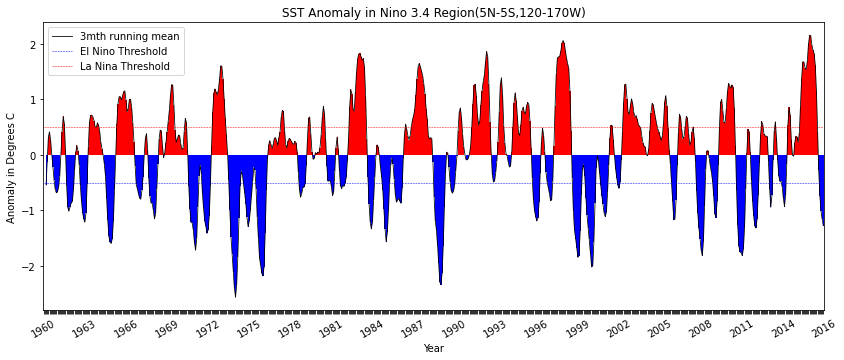

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot 3-month mean sst
nino_all.roll.plot.line(linewidth=0.8, figsize=(14, 5.3), ax=ax, color='black')

# plot El Nino & La Nina Threshold
nino_all.neg_thre.plot.line(linewidth=0.5, ax=ax, color='blue', linestyle='--')
nino_all.pos_thre.plot.line(linewidth=0.5, ax=ax, color='red', linestyle='--')

# plot BAR of Anomaly
nino_all.neg.plot.bar(width=1, stacked=False,  ax=ax, color='blue')
nino_all.pos.plot.bar(width=1, stacked=False, ax=ax, color='red')

# X_Label generating
i = 0
x_label = []
for d in nino_34_roll.index:
    if i % 36 == 0:
        x_label.append(str(d)[0:4])
    else:
        x_label.append('')
    i += 1
x_label[-1] = '2016'
# X_Label Substitute
ax.set_xticklabels(x_label, rotation=30)

# -----------------------  Figure global parameter adjust -----------------------
plt.title('SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')

plt.legend(['3mth running mean', 'El Nino Threshold', 'La Nina Threshold'])
plt.show()
